# LINE GRAPH BEFORE AND AFTER NORMALIZATION - FOR EACH CONTINENT

In [ ]:
import pandas as pd
import requests
import io
import numpy as np
import scipy.stats
import matplotlib
import matplotlib.cm as cm
import seaborn as sns
import itertools
from IPython import display
from ipywidgets import interact, widgets

from google.colab import files
from datetime import datetime
from pandas.plotting import register_matplotlib_converters
from matplotlib import dates as dts
from matplotlib import pyplot as plt
from  matplotlib import style

%matplotlib inline

# select the default graph style
style.use('ggplot')

In [ ]:
url = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'
data = pd.read_csv(url,parse_dates=['date'],index_col=['date'])
data

iso_code continent  ... human_development_index  excess_mortality
date                           ...                                          
2020-02-24      AFG      Asia  ...                   0.511               NaN
2020-02-25      AFG      Asia  ...                   0.511               NaN
2020-02-26      AFG      Asia  ...                   0.511               NaN
2020-02-27      AFG      Asia  ...                   0.511               NaN
2020-02-28      AFG      Asia  ...                   0.511               NaN
...             ...       ...  ...                     ...               ...
2021-06-24      ZWE    Africa  ...                   0.571               NaN
2021-06-25      ZWE    Africa  ...                   0.571               NaN
2021-06-26      ZWE    Africa  ...                   0.571               NaN
2021-06-27      ZWE    Africa  ...                   0.571               NaN
2021-06-28      ZWE    Africa  ...                   0.571               NaN

[98904 rows x 59 columns]

In [ ]:
#locations = ['Russia','France', 'Turkey', 'United Kingdom', 'Italy']
#locations = ['Brazil', 'Argentina', 'Colombia', 'Pero', 'Panama']
#locations = ['United States', 'Mexico', 'Canada']
#locations = ['China', 'India', 'Iran', 'Indonesia', 'Philippines', 'Iraq', 'Israel']
#locations = ['South Africa', 'Morocco', 'Tunisia']
#locations = ['Australia', 'New Zealand', 'Fiji']
locations = ['France', 'United Kingdom', 'Italy','Brazil', 'Argentina','United States', 'Canada','India', 'Israel','South Africa', 'Australia']
#locations = ['United States']


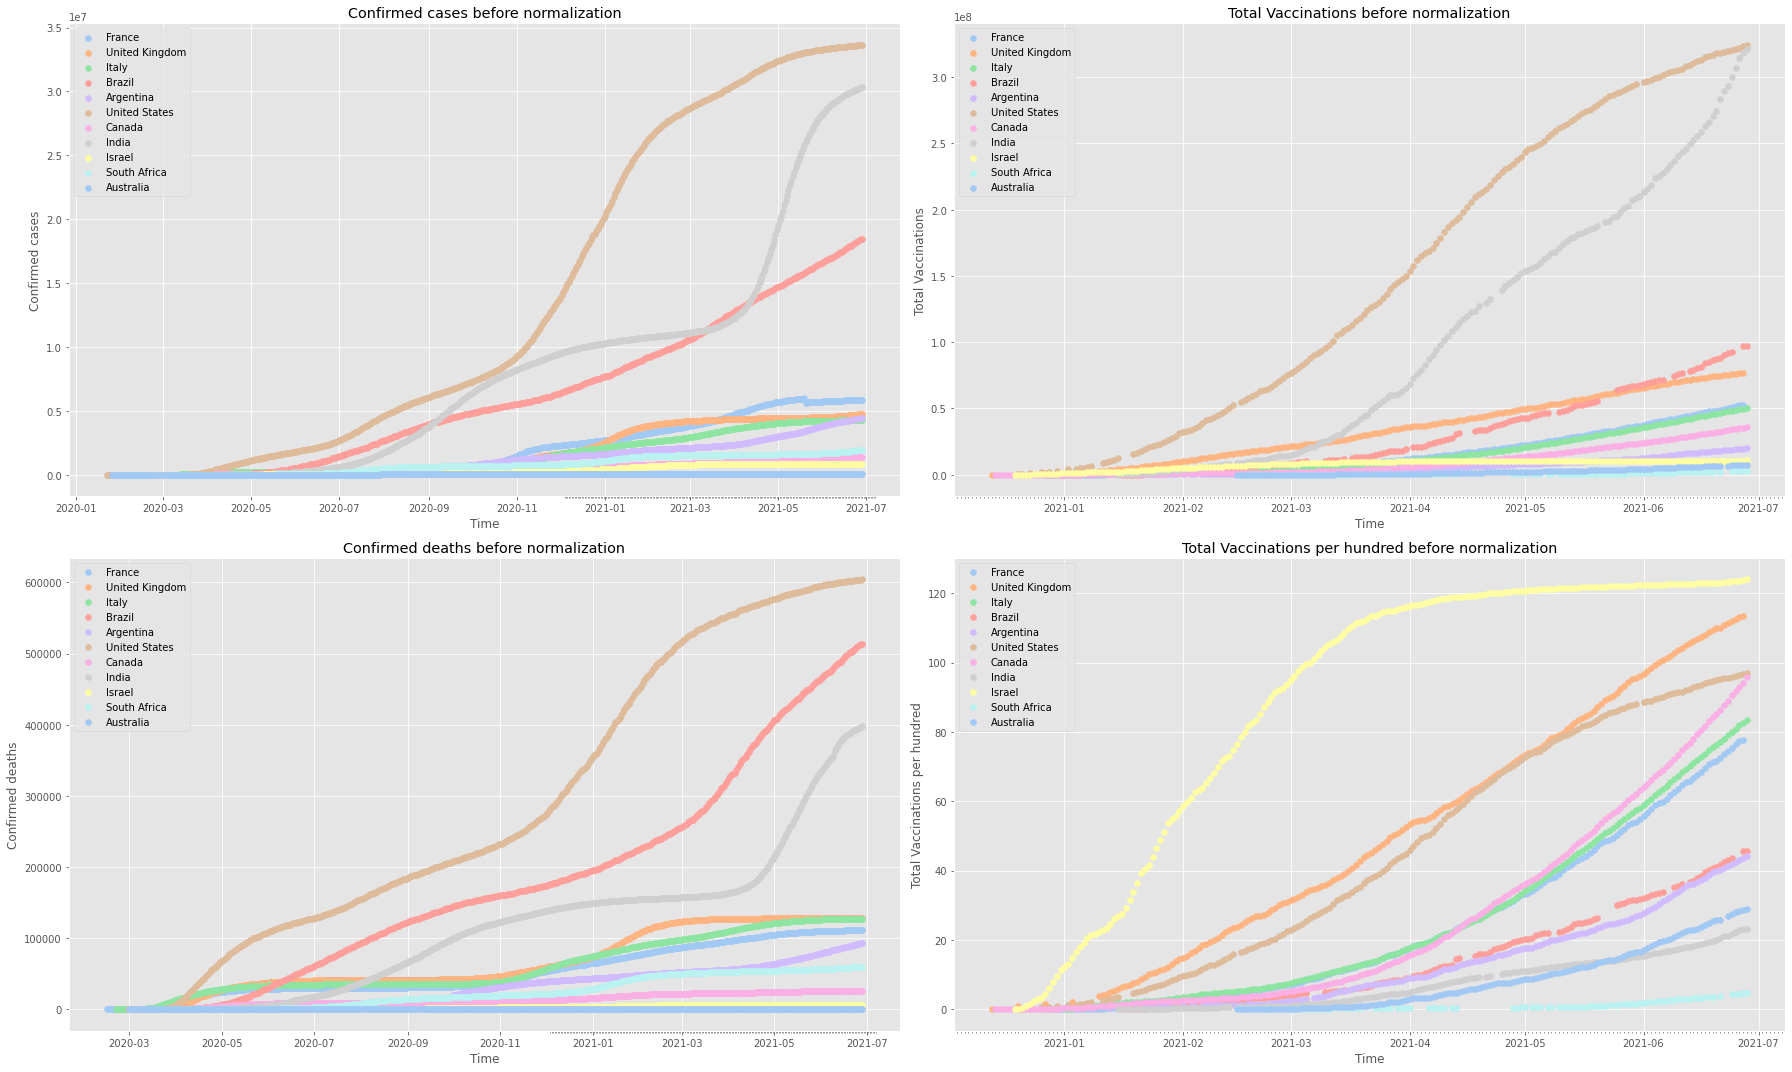

In [ ]:
# define the figure and initialise it to a size
fig = plt.figure(figsize=(25,15))

# supposing we need to do two subplots one next to the other,
# define the subplot to the left; also define some basic parameters of the subplot
ax1 = fig.add_subplot( 2,2,1)
ax1.set_title( 'Confirmed cases before normalization')
ax1.set_xlabel( 'Time')
ax1.set_ylabel( 'Confirmed cases')

# define the subplot to the right; also define some basic parameters of the subplot
ax2 = fig.add_subplot( 2, 2, 3)
ax2.set_title( 'Confirmed deaths before normalization')
ax2.set_xlabel( 'Time')
ax2.set_ylabel( 'Confirmed deaths')

# define the subplot to the right; also define some basic parameters of the subplot
ax3 = fig.add_subplot( 2, 2, 2)
ax3.set_title( 'Total Vaccinations before normalization')
ax3.set_xlabel( 'Time')
ax3.set_ylabel( 'Total Vaccinations')

# define the subplot to the right; also define some basic parameters of the subplot
ax4 = fig.add_subplot( 2, 2, 4)
ax4.set_title( 'Total Vaccinations per hundred before normalization')
ax4.set_xlabel( 'Time')
ax4.set_ylabel( 'Total Vaccinations per hundred')

#To avoid repeating colors
number_of_plots = 11
colors = sns.color_palette("pastel", number_of_plots)
ax1.set_prop_cycle('color', colors)
ax2.set_prop_cycle('color', colors)
ax3.set_prop_cycle('color', colors)
ax4.set_prop_cycle('color', colors)

# run the loop for all countries
for loc in locations:
  # filter the data for a particular country
  df = data.query( "location=='"+loc+"'")
  # get the date field (now the 'index')
  x = df.index

  # create scatter plots for the total cases (on the left) and the total deaths (on the right)
  ax1.scatter( x, df.total_cases, label=loc)
  ax2.scatter( x, df.total_deaths, label=loc)
  ax3.scatter(x,df.total_vaccinations, label=loc)
  ax4.scatter(x,df.total_vaccinations_per_hundred, label=loc)

# display a legend for both subplots
ax1.legend(loc='best')
ax2.legend(loc='best')
ax3.legend(loc='best')
ax4.legend(loc='best')

# maximise the space the graphs will take inside the browser window
plt.tight_layout()

# activate the minor X axis ticks to represent 
days = dts.DayLocator()
ax1.xaxis.set_minor_locator(days)
ax2.xaxis.set_minor_locator(days)
ax3.xaxis.set_minor_locator(days)
ax4.xaxis.set_minor_locator(days)

# and finally display the figure
plt.show()

In [ ]:
# create a timestamp for the file
datetimeSignature = datetime.now()
# create the figure filename
graphFileName = 'confirmed_data_' + datetimeSignature.strftime('%Y_%m_%d_%H_%M_%S') + '.png'
# save the figure
fig.savefig(graphFileName,dpi=300)
# download the figure
files.download(graphFileName)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#Aggregate data via average 
grouped_data = data.groupby(['location']).mean()
grouped_data.head()



total_cases  ...  excess_mortality
location                   ...                  
Afghanistan  4.027051e+04  ...               NaN
Africa       2.083666e+06  ...               NaN
Albania      4.977359e+04  ...            35.310
Algeria      6.468108e+04  ...               NaN
Andorra      5.773089e+03  ...            40.121

[5 rows x 55 columns]

In [ ]:
populations = [0]*len(locations)

for idx, loc in enumerate(locations):
  df = grouped_data.query("location=='"+loc+"'")
  populations[idx]= df.iloc[:,-16]
  #print(populations[idx])
  print("Country=='"+loc+"'", idx, populations[idx])


  #print(x, grouped_data.population)

Country=='France' 0 location
France    67564251.0
Name: population, dtype: float64
Country=='United Kingdom' 1 location
United Kingdom    67886004.0
Name: population, dtype: float64
Country=='Italy' 2 location
Italy    60461828.0
Name: population, dtype: float64
Country=='Brazil' 3 location
Brazil    212559409.0
Name: population, dtype: float64
Country=='Argentina' 4 location
Argentina    45195777.0
Name: population, dtype: float64
Country=='United States' 5 location
United States    331002647.0
Name: population, dtype: float64
Country=='Canada' 6 location
Canada    37742157.0
Name: population, dtype: float64
Country=='India' 7 location
India    1.380004e+09
Name: population, dtype: float64
Country=='Israel' 8 location
Israel    8655541.0
Name: population, dtype: float64
Country=='South Africa' 9 location
South Africa    59308690.0
Name: population, dtype: float64
Country=='Australia' 10 location
Australia    25499881.0
Name: population, dtype: float64


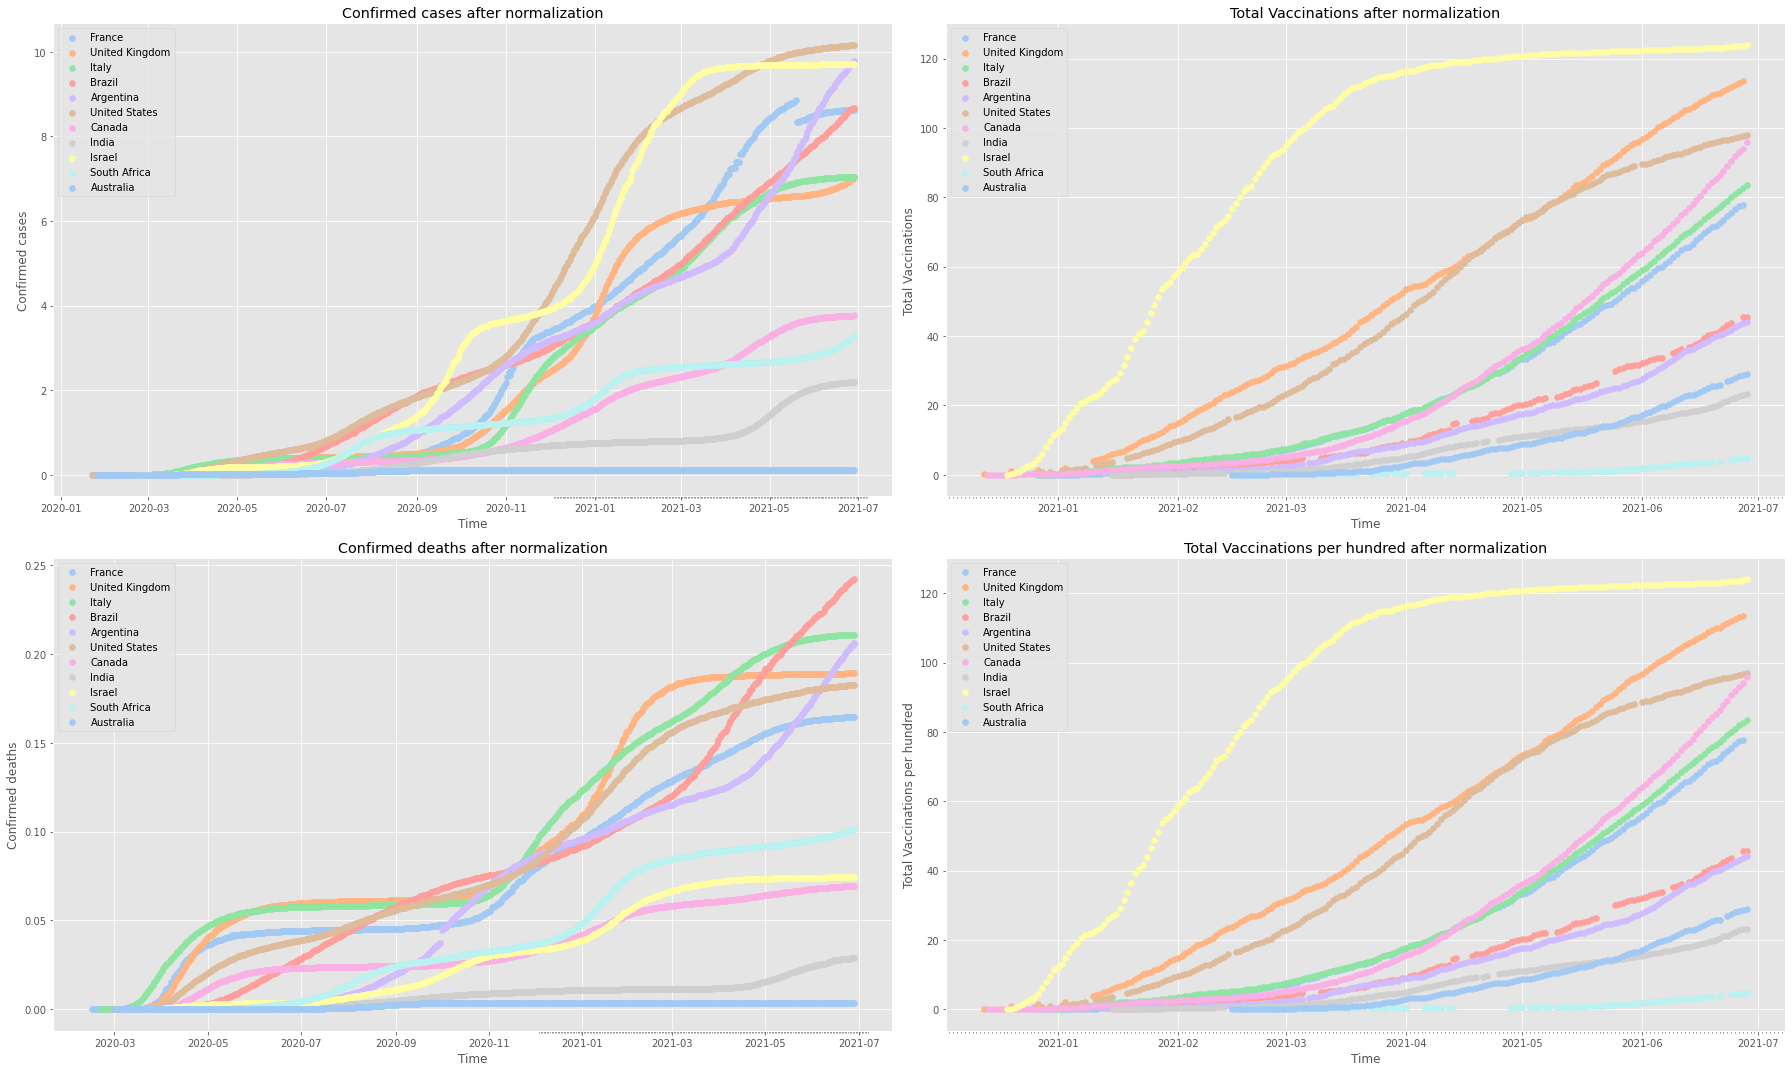

In [ ]:
# define the figure and initialise it to a size
fig = plt.figure(figsize=(25,15))

# supposing we need to do two subplots one next to the other,
# define the subplot to the left; also define some basic parameters of the subplot
ax1 = fig.add_subplot( 2, 2, 1)
ax1.set_title( 'Confirmed cases after normalization')
ax1.set_xlabel( 'Time')
ax1.set_ylabel( 'Confirmed cases')

# define the subplot to the right; also define some basic parameters of the subplot
ax2 = fig.add_subplot( 2, 2, 3)
ax2.set_title( 'Confirmed deaths after normalization')
ax2.set_xlabel( 'Time')
ax2.set_ylabel( 'Confirmed deaths')

# define the subplot to the right; also define some basic parameters of the subplot
ax3 = fig.add_subplot( 2, 2, 2)
ax3.set_title( 'Total Vaccinations after normalization')
ax3.set_xlabel( 'Time')
ax3.set_ylabel( 'Total Vaccinations')

# define the subplot to the right; also define some basic parameters of the subplot
ax4 = fig.add_subplot( 2, 2, 4)
ax4.set_title( 'Total Vaccinations per hundred after normalization')
ax4.set_xlabel( 'Time')
ax4.set_ylabel( 'Total Vaccinations per hundred')

#To avoid repeating colors
number_of_plots = 11
colors = sns.color_palette("pastel", number_of_plots)
ax1.set_prop_cycle('color', colors)
ax2.set_prop_cycle('color', colors)
ax3.set_prop_cycle('color', colors)
ax4.set_prop_cycle('color', colors)

# run the loop for all countries
for idx,loc in enumerate(locations):
  df = data.query( "location=='"+loc+"'")
  x = df.index
  ax1.scatter( x, 100*df["total_cases"]/df["population"], label=loc)
  ax2.scatter( x, 100*df["total_deaths"]/df["population"], label=loc)
  ax3.scatter( x, 100*df["total_vaccinations"]/df["population"], label=loc)
  ax4.scatter( x, df["total_vaccinations_per_hundred"], label=loc)
  

# display a legend for both subplots
ax1.legend(loc='best')
ax2.legend(loc='best')
ax3.legend(loc='best')
ax4.legend(loc='best')


# maximise the space the graphs will take inside the browser window
plt.tight_layout()
# activate the minor X axis ticks to represent days
days = dts.DayLocator()
ax1.xaxis.set_minor_locator(days)
ax2.xaxis.set_minor_locator(days)
ax3.xaxis.set_minor_locator(days)
ax4.xaxis.set_minor_locator(days)

# and finally display the figure
plt.show()

In [ ]:
# create a timestamp for the file
datetimeSignature = datetime.now()
# create the figure filename
graphFileName = 'confirmed_data_' + datetimeSignature.strftime('%Y_%m_%d_%H_%M_%S') + '.png'
# save the figure
fig.savefig(graphFileName,dpi=300)
# download the figure
files.download(graphFileName)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Interactive visualization with world map

In [ ]:
url = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'
data1 = pd.read_csv(url)
data1.head()

iso_code continent  ... human_development_index excess_mortality
0      AFG      Asia  ...                   0.511              NaN
1      AFG      Asia  ...                   0.511              NaN
2      AFG      Asia  ...                   0.511              NaN
3      AFG      Asia  ...                   0.511              NaN
4      AFG      Asia  ...                   0.511              NaN

[5 rows x 60 columns]

In [ ]:
#Data excluding world
data1 = data1[data1.location != 'World']

#Data sort by date
data1 = data1.sort_values(by=['date'])

data1['new_date'] = pd.to_datetime(data1['date'])
data1['Year-Week'] = data1['new_date'].dt.strftime('%Y-%U')
data1.head()

iso_code      continent   location  ... excess_mortality   new_date  Year-Week
57280      MEX  North America     Mexico  ...              NaN 2020-01-01    2020-00
3517       ARG  South America  Argentina  ...              NaN 2020-01-01    2020-00
57281      MEX  North America     Mexico  ...              NaN 2020-01-02    2020-00
3518       ARG  South America  Argentina  ...              NaN 2020-01-02    2020-00
3519       ARG  South America  Argentina  ...              NaN 2020-01-03    2020-00

[5 rows x 62 columns]

In [ ]:
import plotly.express as px
fig = px.choropleth(data1, locations="iso_code", 
                    color="total_vaccinations", 
                    hover_name="location", 
                    animation_frame="Year-Week", 
                    title= "Total Vaccinations",
                    color_continuous_scale=px.colors.sequential.PuRd)

fig["layout"].pop("updatemenus")
fig.show()



In [ ]:
#Export as png
#fig.write_image("yourfile.png") 


## Seasonality charts

In [ ]:
url = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'
data = pd.read_csv(url,parse_dates=['date'],index_col=['date'])
data.head()

iso_code continent  ... human_development_index  excess_mortality
date                           ...                                          
2020-02-24      AFG      Asia  ...                   0.511               NaN
2020-02-25      AFG      Asia  ...                   0.511               NaN
2020-02-26      AFG      Asia  ...                   0.511               NaN
2020-02-27      AFG      Asia  ...                   0.511               NaN
2020-02-28      AFG      Asia  ...                   0.511               NaN

[5 rows x 59 columns]

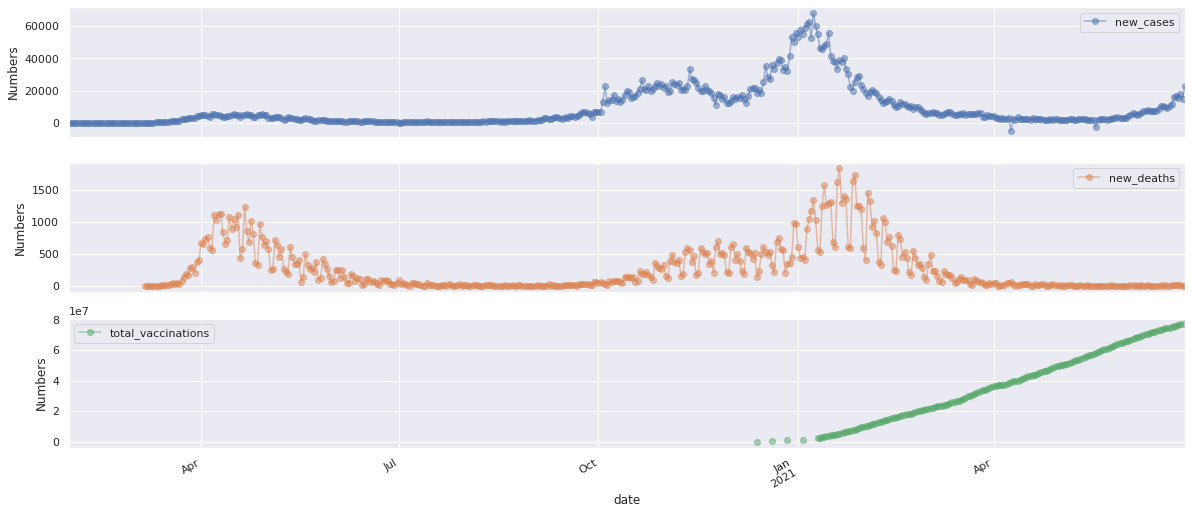

In [ ]:
import seaborn as sns

data_world = data[(data['location'] == 'United Kingdom')]
parameters = ['new_cases', 'new_deaths','total_vaccinations']
axes = data_world[parameters].plot(marker='o', alpha=0.5, linestyle='-', figsize=(20,9), subplots=True)
for ax in axes:
  ax.set_ylabel('Numbers')

plt.savefig('Seasonality.png')
#sns.set(rc={'figure.figsize': (20, 15)})
#y['total_cases'].plot(linewidth=0.5)

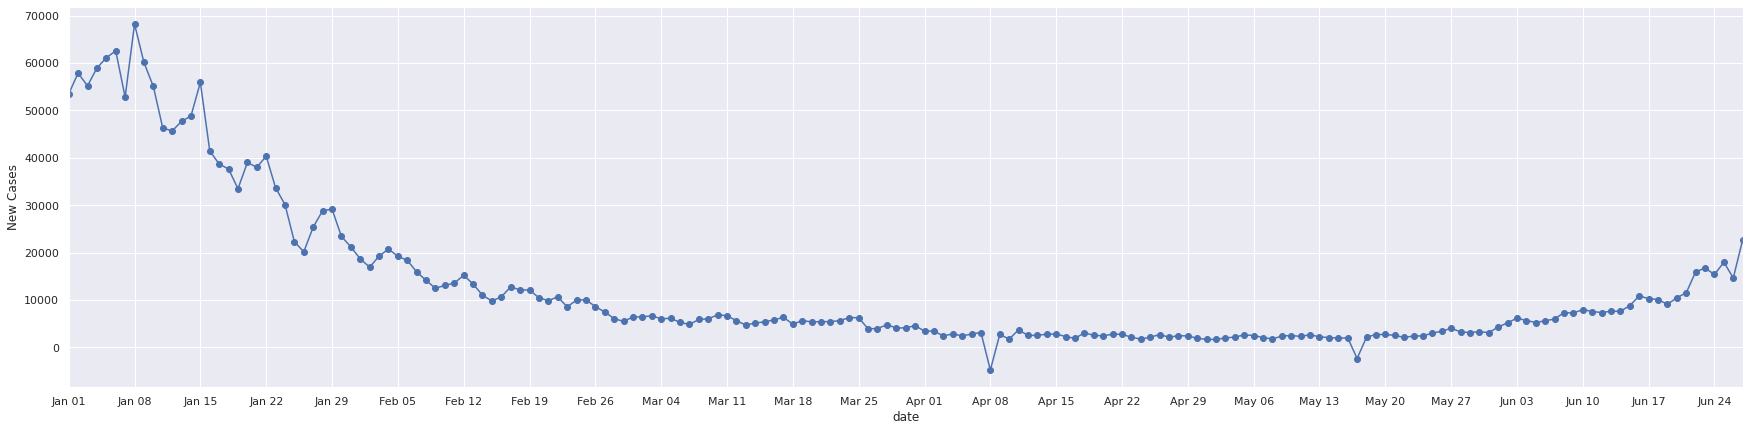

In [ ]:
import matplotlib.dates as mdates
fig, ax=plt.subplots()

ax1 = data_world.loc['2021-01': '2021-07', 'new_cases'].plot(marker='o', linestyle='-' , figsize=(30,7),)
ax1.set_ylabel('New Cases')
ax1.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));

plt.savefig('New_cases.png')

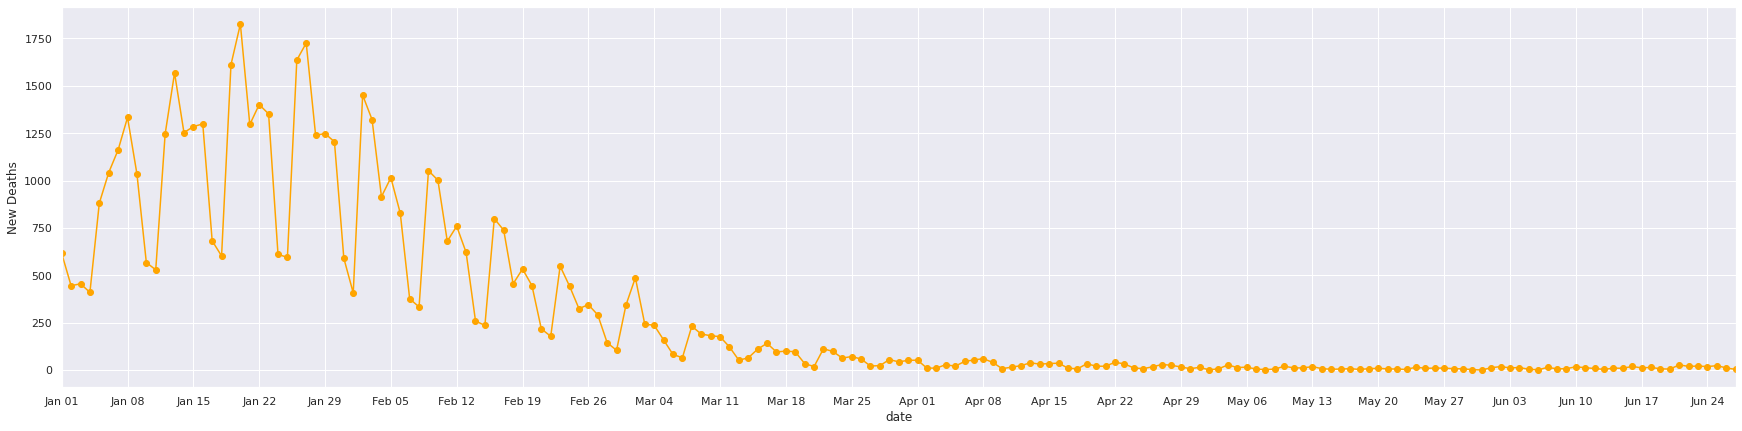

In [ ]:
import matplotlib.dates as mdates
fig, ax=plt.subplots()

ax2 = data_world.loc['2021-01': '2021-07', 'new_deaths'].plot(marker='o', linestyle='-' , figsize=(30,7), color='orange')
ax2.set_ylabel('New Deaths')

ax2.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))

ax2.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));

plt.savefig('New Deaths.png')


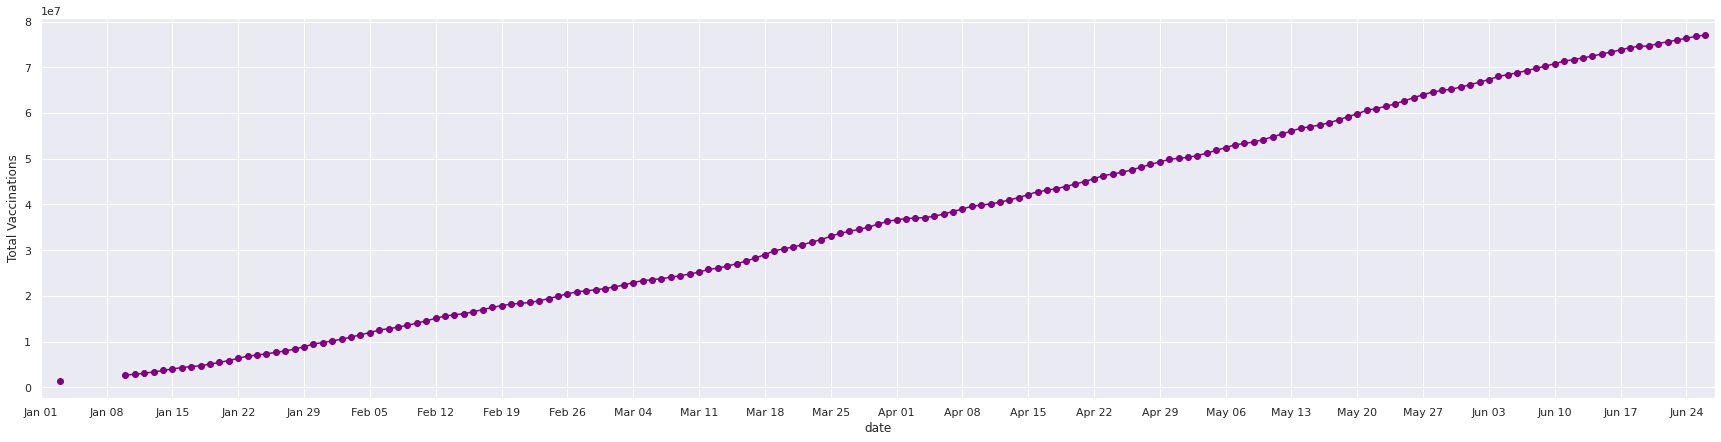

In [ ]:
import matplotlib.dates as mdates
fig, ax=plt.subplots()

ax3 = data_world.loc['2021-01': '2021-07', 'total_vaccinations'].plot(marker='o', linestyle='-' , figsize=(30,7),color='purple')
ax3.set_ylabel('Total Vaccinations')

ax3.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))

ax3.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));

plt.savefig('Vaccinations.png')


In [ ]:
url = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'
covid_data = pd.read_csv(url)
covid_data['date'] = pd.to_datetime(covid_data['date'])
covid_data['Month'] = pd.DatetimeIndex(covid_data['date']).month
covid_data['Year'] = pd.DatetimeIndex(covid_data['date']).year
covid_data['MonthYear'] = covid_data['date'].dt.to_period('M')
covid_data_world = covid_data[(covid_data['location'] == 'Argentina')]

(covid_data_world.groupby(['MonthYear'], as_index=False).mean().groupby('MonthYear').mean())

covid_data_world.head()

iso_code      continent   location  ... Month  Year  MonthYear
3538      ARG  South America  Argentina  ...     1  2020    2020-01
3539      ARG  South America  Argentina  ...     1  2020    2020-01
3540      ARG  South America  Argentina  ...     1  2020    2020-01
3541      ARG  South America  Argentina  ...     1  2020    2020-01
3542      ARG  South America  Argentina  ...     1  2020    2020-01

[5 rows x 63 columns]

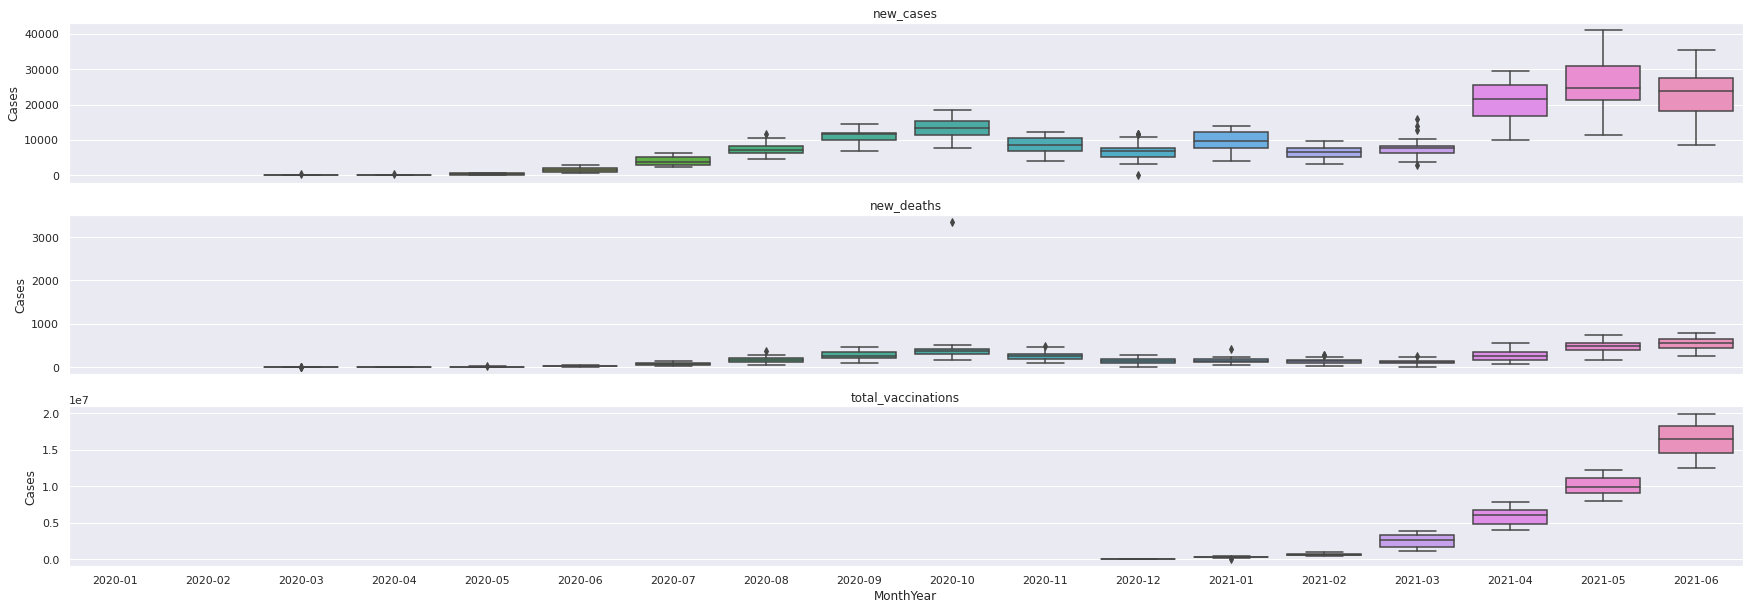

In [ ]:
#Group data by Month
fig, axes = plt.subplots(3, 1, figsize=(30, 10), sharex=True)
for name, ax in zip(['new_cases', 'new_deaths', 'total_vaccinations'], axes):
  sns.boxplot(data=covid_data_world, x='MonthYear', y=name, ax=ax)
  ax.set_ylabel('Cases')
  ax.set_title(name)

  if ax != axes[-1]:
    ax.set_xlabel('')

plt.savefig('Seasonality.png')

# ARIMA

In [ ]:
#Import data 
url = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'
series = pd.read_csv(url, header=0, parse_dates=['date'],index_col=['date'])


#Filter by country
series = series.loc[series['location'] == 'United States']

#Drop irrelavent columns
series = series[['total_vaccinations']]

#Change datatype of date column to datetime
#series.date = pd.to_datetime(series.date)
#series.info()

#Replace NAN to 0
series_sorted = series.sort_values('total_vaccinations')
series = series_sorted.replace(np.nan,0)

#remove rows with zero values
series = series[(series.T != 0).any()]

#series.index = pd.DatetimeIndex(series.index).to_period('M')

series

total_vaccinations
date                          
2020-12-20            556208.0
2020-12-21            614117.0
2020-12-23           1008025.0
2020-12-26           1944585.0
2020-12-28           2127143.0
...                        ...
2021-06-25         321199379.0
2021-06-26         322123103.0
2021-06-27         323327328.0
2021-06-28         324414371.0
2021-06-29         325152847.0

[177 rows x 1 columns]

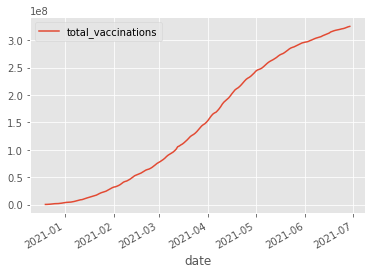

In [ ]:
series.plot()
plt.show()

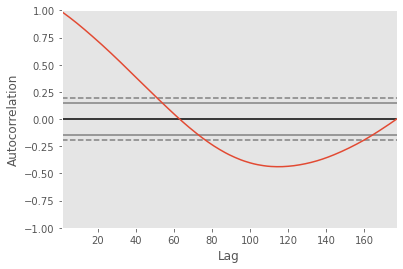

In [ ]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(series)
plt.show()


                              ARIMA Model Results                               
Dep. Variable:     D.total_vaccinations   No. Observations:                  176
Model:                   ARIMA(2, 1, 2)   Log Likelihood               -2586.908
Method:                         css-mle   S.D. of innovations         582223.100
Date:                  Wed, 30 Jun 2021   AIC                           5185.817
Time:                          20:37:05   BIC                           5204.840
Sample:                      01-02-2020   HQIC                          5193.532
                           - 06-25-2020                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       1.844e+06   9.43e+05      1.955      0.052   -4757.012    3.69e+06
ar.L1.D.total_vaccinations     1.1719      0.172      6.794      0.

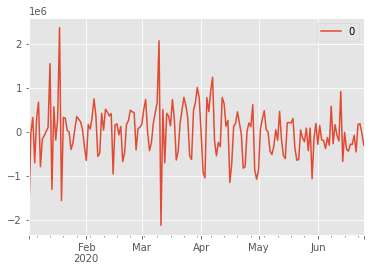

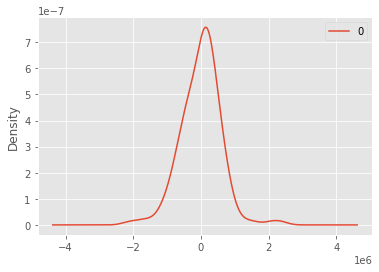

In [ ]:
from statsmodels.tsa.arima_model  import ARIMA
from pandas import DataFrame

#series.index = series.index.to_period('M')
series.index = pd.date_range("2020-01-01", periods=177)
# fit model
model = ARIMA(series, order=(2,1,2))
model_fit = model.fit()

# summary of fit model
print(model_fit.summary())

# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
plt.show()

# density plot of residuals
residuals.plot(kind='kde')
plt.show()

# summary stats of residuals
desc = residuals.describe()

predicted=298114771.534157, expected=297720928.000000
predicted=299015876.313776, expected=299120522.000000
predicted=301020903.725611, expected=300268730.000000
predicted=301806012.134582, expected=301638578.000000
predicted=303223584.862524, expected=302851917.000000
predicted=304523402.259549, expected=303923667.000000
predicted=305365427.246763, expected=304753476.000000
predicted=306092078.166647, expected=305687618.000000
predicted=307145623.835823, expected=306509795.000000
predicted=307889826.273427, expected=308112728.000000
predicted=309947301.610606, expected=309322545.000000
predicted=310951362.961338, expected=310645827.000000
predicted=312143380.465411, expected=311886674.000000
predicted=313531768.177059, expected=312915170.000000
predicted=314344730.316258, expected=314969386.000000
predicted=317033591.925335, expected=316048776.000000
predicted=317627447.273945, expected=317117797.000000
predicted=318336985.480545, expected=317966408.000000
predicted=319446289.937442, 

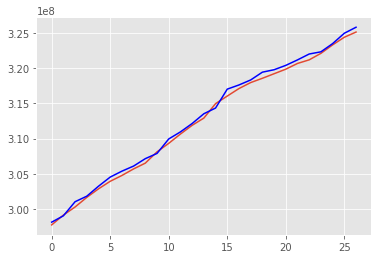

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

#series.index = series.index.to_period('M')
series.index = pd.date_range("2020-01-01", periods=177)

# split into train and test sets
X = series.values
size = int(len(X) * 0.85)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(0,1,2))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))

# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='blue')
plt.show()